In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from math import ceil

def get_sample(sequence, num):
    length = float(len(sequence))
    res = []
    for i in range(num):
        res.append(sequence[int(ceil(i * length / num))])
    return res

def get_dist(v1, v2):
    res = 0
    for i in range(len(v1)):
        res = res + (v1[i]-v2[i]) ** 2
    return res

In [88]:
kgp = pd.read_csv('data/kgp.csv')
bha = pd.read_csv('data/bha.csv')

In [89]:
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Bihar',
'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
'Himachal Pradesh', 'India', 'Jammu and Kashmir', 'Jharkhand',
'Karnataka', 'Kerala', 'Madhya Pradesh', 'Manipur', 'Meghalaya',
'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu',
'Telangana', 'Uttar Pradesh', 'West Bengal']
kgp['count'] = kgp['count'] / kgp['count'].max()

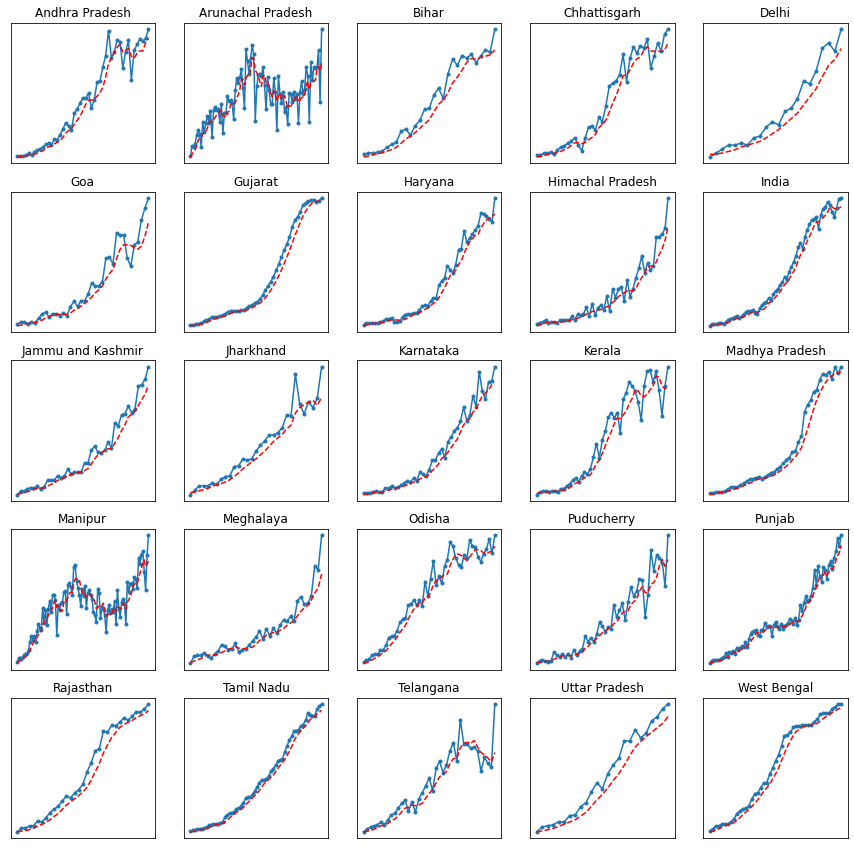

In [90]:
sz = 5

fig1, axs1 = plt.subplots(sz, sz, figsize = (15, 15))

counter = 0

for state in states:
        id_x = int(counter / sz)
        id_y = int(counter % sz)
        counter = counter + 1
        
        df = bha[bha['state'] == state]
        df = df.reset_index(drop = True)

        mx = df.describe().loc['max']['count']
        cutoff = mx * 0.05

        df['count'] = df['count'] / mx
        df['rm'] = df['count'].rolling(5).mean()
        
        #--------------
        
        id_start = 0
        id_end = df['count'].idxmax()

        mx = df.describe().loc['max']['count']
        cutoff = mx * 0.05

        for id in range(id_end, 0, -1):
            if df.iloc[id]['count'] < cutoff:
                id_start = id
                break
        
        #-------------
        
        df = df.iloc[id_start : id_end+1]
        df = df.reset_index(drop = True)
        
        #-------------
        
        axs1[id_x, id_y].plot(df['date'], df['count'], '.-')
        
        axs1[id_x, id_y].plot(df['date'], df['rm'], 'r--')
        
        axs1[id_x, id_y].set_xticks([])
        axs1[id_x, id_y].set_yticks([])
        
        axs1[id_x, id_y].set_title(state)

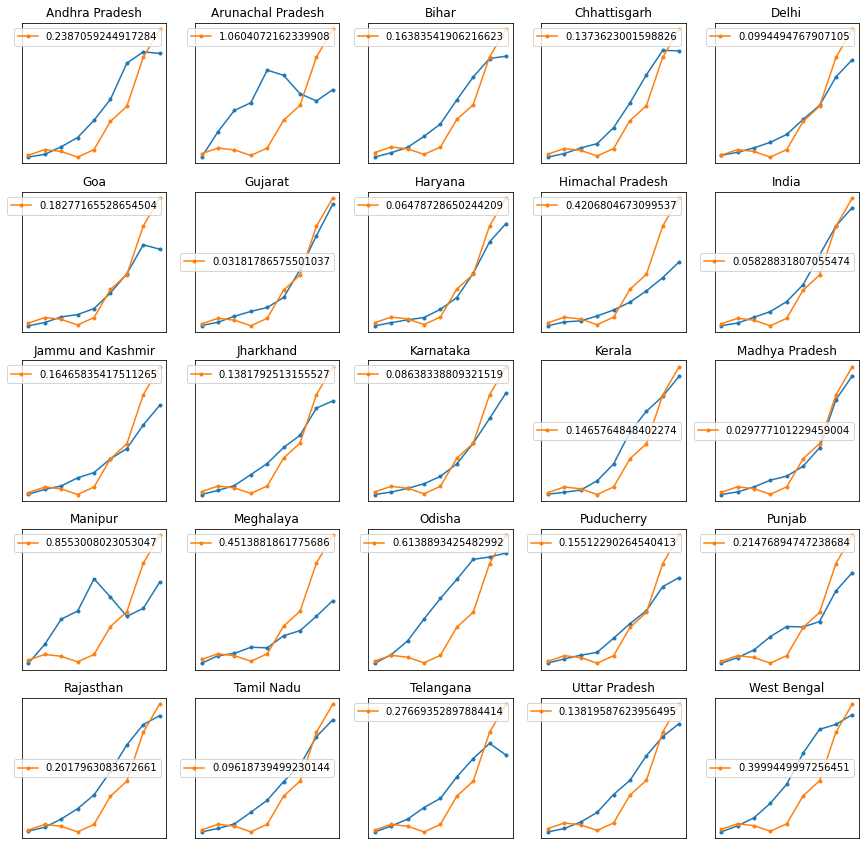

In [91]:
sz = 5

fig2, axs2 = plt.subplots(sz, sz, figsize = (15, 15))

counter = 0

for state in states:
        id_x = int(counter / sz)
        id_y = int(counter % sz)
        counter = counter + 1
        
        df = bha[bha['state'] == state]
        df = df.reset_index(drop = True)

        mx = df.describe().loc['max']['count']
        cutoff = mx * 0.05

        df['count'] = df['count'] / mx
        df['rm'] = df['count'].rolling(5).mean()
        
        #--------------
        
        id_start = 0
        id_end = df['count'].idxmax()

        mx = df.describe().loc['max']['count']
        cutoff = mx * 0.05

        for id in range(id_end, 0, -1):
            if df.iloc[id]['count'] < cutoff:
                id_start = id
                break
        
        #-------------
        
        df = df.iloc[id_start : id_end+1]
        df = df.reset_index(drop = True)
        
        #-------------
        
        sample = get_sample(df['rm'], len(kgp.index))
        
        dist = get_dist(sample, kgp['count'])
        
        #-------------
        
        axs2[id_x, id_y].plot(range(0, 9), sample, '.-')
        
        axs2[id_x, id_y].plot(range(0, 9), kgp['count'], '.-', label = str(dist))
        axs2[id_x, id_y].legend()
        
        axs2[id_x, id_y].set_xticks([])
        axs2[id_x, id_y].set_yticks([])
        
        axs2[id_x, id_y].set_title(state)

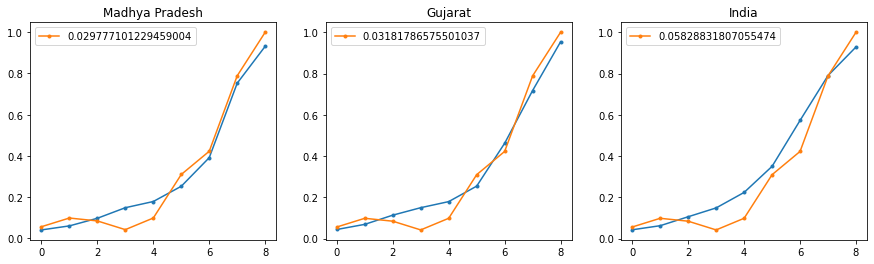

In [92]:
states = ['Madhya Pradesh', 'Gujarat', 'India']

fig3, axs3 = plt.subplots(1, 3, figsize = (15, 4))
id_x = 0

for state in states:
    df = bha[bha['state'] == state]
    df = df.reset_index(drop = True)

    mx = df.describe().loc['max']['count']
    cutoff = mx * 0.05

    df['count'] = df['count'] / mx
    df['rm'] = df['count'].rolling(5).mean()

    #--------------

    id_start = 0
    id_end = df['count'].idxmax()

    mx = df.describe().loc['max']['count']
    cutoff = mx * 0.05

    for id in range(id_end, 0, -1):
        if df.iloc[id]['count'] < cutoff:
            id_start = id
            break

    #-------------

    df = df.iloc[id_start : id_end+1]
    df = df.reset_index(drop = True)

    #-------------

    sample = get_sample(df['rm'], len(kgp.index))

    dist = get_dist(sample, kgp['count'])

    #-------------

    axs3[id_x].plot(range(0, 9), sample, '.-')
    axs3[id_x].plot(range(0, 9), kgp['count'], '.-', label = str(dist))
    axs3[id_x].set_title(state)
    axs3[id_x].legend()
    
    id_x = id_x + 1

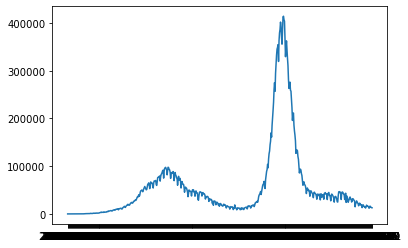

In [93]:
state = 'India'
df = bha[bha['state'] == state]
df = df.reset_index(drop = True)
plt.plot(df['date'], df['count'])

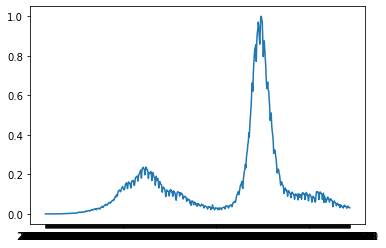

In [94]:
mx = df['count'].max()
df['scaled_count'] = df['count'] / mx
plt.plot(df['date'], df['scaled_count'])

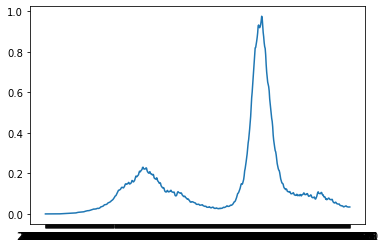

In [95]:
df['rm'] = df['scaled_count'].rolling(5).mean()
df = df.dropna()
df = df.reset_index(drop = True)
plt.plot(df['date'], df['rm'])

In [96]:
mid_top = df['rm'].idxmax()
left_base = mid
right_base = mid

for i in range(mid, 0, -1):
    if df.iloc[i]['rm'] < 0.1:
        left_base = i
        break
for i in range(mid, len(df.index)-1, 1):
    if df.iloc[i]['rm'] < 0.1:
        right_base = i
        break

# df.iloc[left_base]['rm'], df.iloc[mid_top]['rm'], df.iloc[right_base]['rm']
left_base, mid_top, right_base

(383, 432, 491)

In [97]:
8 * (right_base - mid_top) / (mid_top - left_base)

9.63265306122449

In [99]:
for state in ['Madhya Pradesh', 'Gujarat', 'India']:
    df = bha[bha['state'] == state]
    df = df.reset_index(drop = True)
    
    mx = df['count'].max()
    df['scaled_count'] = df['count'] / mx
    
    df['rm'] = df['scaled_count'].rolling(5).mean()
    df = df.dropna()
    df = df.reset_index(drop = True)
    
    mid_top = df['rm'].idxmax()
    left_base = mid_top
    right_base = mid_top

    for i in range(mid, 0, -1):
        if df.iloc[i]['rm'] < 0.1:
            left_base = i
            break
    for i in range(mid, len(df.index)-1, 1):
        if df.iloc[i]['rm'] < 0.1:
            right_base = i
            break
    
    print('using reference', state, 8 * (right_base - mid_top) / (mid_top - left_base), 'days more')

using reference Madhya Pradesh 8.228571428571428 days more
using reference Gujarat 7.0 days more
using reference India 9.63265306122449 days more
